In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Set style for better readability
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 13


In [ ]:
# Load data and define constants
data_path = Path("../responses.csv")
df = pd.read_csv(data_path)

# Define teams of interest
TEAMS = ['Kiwi', 'Coconut', 'Mango', 'Pineapple', 'Other', 'Other Engineer']

# Column names
TEAM_COL = 'Which team are you a part of?'
FREQUENCY_COL = 'How frequently do you currently use AI tools/models in your development process?'

print(f"✓ Loaded {len(df)} survey responses")
print(f"✓ Analyzing {len(TEAMS)} teams: {', '.join(TEAMS)}")


In [ ]:
def calculate_adoption_metrics(df, team_name):
    """
    Calculate AI adoption metrics for a specific team.
    
    Returns:
        dict: Contains team name, total members, regular users, daily users, and percentages
    """
    team_df = df[df[TEAM_COL] == team_name].copy()
    
    if len(team_df) == 0:
        return None
    
    total = len(team_df)
    
    # Regular users: Daily or Several times a week
    regular_users = len(team_df[
        team_df[FREQUENCY_COL].isin(['Daily', 'Several times a week'])
    ])
    
    # Daily users
    daily_users = len(team_df[team_df[FREQUENCY_COL] == 'Daily'])
    
    # Calculate percentages
    regular_pct = (regular_users / total) * 100 if total > 0 else 0
    daily_pct = (daily_users / total) * 100 if total > 0 else 0
    
    return {
        'team': team_name,
        'total': total,
        'regular_users': regular_users,
        'daily_users': daily_users,
        'regular_pct': regular_pct,
        'daily_pct': daily_pct
    }


In [ ]:
# Calculate adoption metrics for all teams
metrics = []
for team in TEAMS:
    metric = calculate_adoption_metrics(df, team)
    if metric:
        metrics.append(metric)

metrics_df = pd.DataFrame(metrics)

# Sort by regular adoption rate (descending) for better visualization
metrics_df = metrics_df.sort_values('regular_pct', ascending=False)

print("Adoption Metrics Summary:")
print(metrics_df[['team', 'total', 'regular_pct', 'daily_pct']].to_string(index=False))


In [ ]:
# Create comprehensive adoption rate dashboard
fig = plt.figure(figsize=(18, 11))
gs = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.35)

# Modern color palette - teal/emerald gradient
colors = ['#0D9488', '#14B8A6', '#5EEAD4', '#10B981', '#F59E0B', '#F97316']

# ===== CHART 1: Regular Adoption Rate =====
ax1 = fig.add_subplot(gs[0, 0])

bars1 = ax1.barh(
    metrics_df['team'],
    metrics_df['regular_pct'],
    color=colors[:len(metrics_df)],
    edgecolor='white',
    linewidth=2,
    height=0.7
)

# Add value labels with better positioning
for i, (bar, pct, count) in enumerate(zip(bars1, metrics_df['regular_pct'], metrics_df['regular_users'])):
    ax1.text(
        bar.get_width() + 2,
        bar.get_y() + bar.get_height()/2,
        f'{pct:.0f}% ({int(count)})',
        va='center',
        fontsize=11,
        weight='bold',
        color='#1F2937'
    )

ax1.set_xlabel('Adoption Rate (%)', fontsize=12, weight='bold', labelpad=10)
ax1.set_title('Regular AI Users\n(Daily or Several times/week)', 
              fontsize=14, weight='bold', pad=20)
ax1.set_xlim(0, 110)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.8)
ax1.set_axisbelow(True)

# ===== CHART 2: Daily Users Rate =====
ax2 = fig.add_subplot(gs[0, 1])

bars2 = ax2.barh(
    metrics_df['team'],
    metrics_df['daily_pct'],
    color=colors[:len(metrics_df)],
    edgecolor='white',
    linewidth=2,
    height=0.7
)

for i, (bar, pct, count) in enumerate(zip(bars2, metrics_df['daily_pct'], metrics_df['daily_users'])):
    ax2.text(
        bar.get_width() + 2,
        bar.get_y() + bar.get_height()/2,
        f'{pct:.0f}% ({int(count)})',
        va='center',
        fontsize=11,
        weight='bold',
        color='#1F2937'
    )

ax2.set_xlabel('Daily Users (%)', fontsize=12, weight='bold', labelpad=10)
ax2.set_title('Daily AI Users', fontsize=14, weight='bold', pad=20)
ax2.set_xlim(0, 110)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.8)
ax2.set_axisbelow(True)

# ===== CHART 3: Team Size Comparison =====
ax3 = fig.add_subplot(gs[0, 2])

bars3 = ax3.barh(
    metrics_df['team'],
    metrics_df['total'],
    color=colors[:len(metrics_df)],
    edgecolor='white',
    linewidth=2,
    height=0.7
)

for bar, count in zip(bars3, metrics_df['total']):
    ax3.text(
        bar.get_width() + 0.3,
        bar.get_y() + bar.get_height()/2,
        f'{int(count)}',
        va='center',
        fontsize=11,
        weight='bold',
        color='#1F2937'
    )

ax3.set_xlabel('Number of Members', fontsize=12, weight='bold', labelpad=10)
ax3.set_title('Team Size', fontsize=14, weight='bold', pad=20)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.8)
ax3.set_axisbelow(True)

# Overall title
fig.suptitle(
    'AI Adoption Rates Across Engineering Teams',
    fontsize=18,
    weight='bold',
    y=0.98
)

plt.tight_layout()
plt.show()


In [ ]:
# ===== Frequency Distribution by Team (Stacked Bar Chart) =====
fig, ax = plt.subplots(figsize=(15, 7))

# Prepare data for frequency distribution
frequency_data = []
frequency_order = ['Daily', 'Several times a week', 'Weekly', 'Monthly', 'Rarely or Never']

for team in TEAMS:
    team_df = df[df[TEAM_COL] == team]
    if len(team_df) > 0:
        freq_counts = team_df[FREQUENCY_COL].value_counts().reindex(frequency_order, fill_value=0)
        for freq, count in freq_counts.items():
            if count > 0:  # Only include non-zero values
                frequency_data.append({
                    'Team': team,
                    'Frequency': freq,
                    'Count': count,
                    'Percentage': (count / len(team_df)) * 100
                })

freq_df = pd.DataFrame(frequency_data)

# Create stacked bar chart
freq_pivot = freq_df.pivot(index='Team', columns='Frequency', values='Percentage')
freq_pivot = freq_pivot.reindex(columns=frequency_order, fill_value=0)
freq_pivot = freq_pivot.reindex(metrics_df['team'].values)  # Use same order as metrics

# Color gradient from most frequent (dark) to least frequent (light)
freq_colors = ['#0D9488', '#14B8A6', '#5EEAD4', '#F59E0B', '#FCD34D']

freq_pivot.plot(
    kind='barh',
    stacked=True,
    ax=ax,
    color=freq_colors,
    edgecolor='white',
    linewidth=1.5,
    width=0.7
)

ax.set_xlabel('Percentage of Team (%)', fontsize=13, weight='bold', labelpad=10)
ax.set_ylabel('Team', fontsize=13, weight='bold', labelpad=10)
ax.set_title('AI Usage Frequency Distribution by Team', 
              fontsize=16, weight='bold', pad=20)
ax.set_xlim(0, 100)
ax.legend(
    title='Usage Frequency',
    title_fontsize=11,
    fontsize=10,
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    framealpha=0.9
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


In [ ]:
# Print formatted summary statistics
print("\n" + "=" * 70)
print("AI ADOPTION RATE SUMMARY".center(70))
print("=" * 70)
print(f"\n{'Team':<20} {'Size':<8} {'Regular Users':<15} {'Daily Users':<12}")
print(f"{'':<20} {'':<8} {'(%)':<15} {'(%)':<12}")
print("-" * 70)

for _, row in metrics_df.iterrows():
    print(f"{row['team']:<20} {int(row['total']):<8} "
          f"{row['regular_pct']:>6.0f}% ({int(row['regular_users']):<2})  "
          f"{row['daily_pct']:>6.0f}% ({int(row['daily_users']):<2})")

print("-" * 70)

# Calculate overall averages
overall_regular = metrics_df['regular_pct'].mean()
overall_daily = metrics_df['daily_pct'].mean()
total_people = metrics_df['total'].sum()
total_regular = metrics_df['regular_users'].sum()
total_daily = metrics_df['daily_users'].sum()

print(f"{'OVERALL AVERAGE':<20} {int(total_people):<8} "
      f"{overall_regular:>6.0f}% ({int(total_regular):<2})  "
      f"{overall_daily:>6.0f}% ({int(total_daily):<2})")
print("=" * 70 + "\n")


/var/folders/k7/nk16v26j38j_mcwrggjp5tpc0000gn/T/ipykernel_31582/1848513629.py:266: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/andrew/Documents/Coder_Projects/AI_Usage/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andrew/Documents/Coder_Projects/AI_Usage/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andrew/Documents/Coder_Projects/AI_Usage/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/andrew/Documents/Coder_Projects/AI_Usage/.venv/lib/python3.9/site-

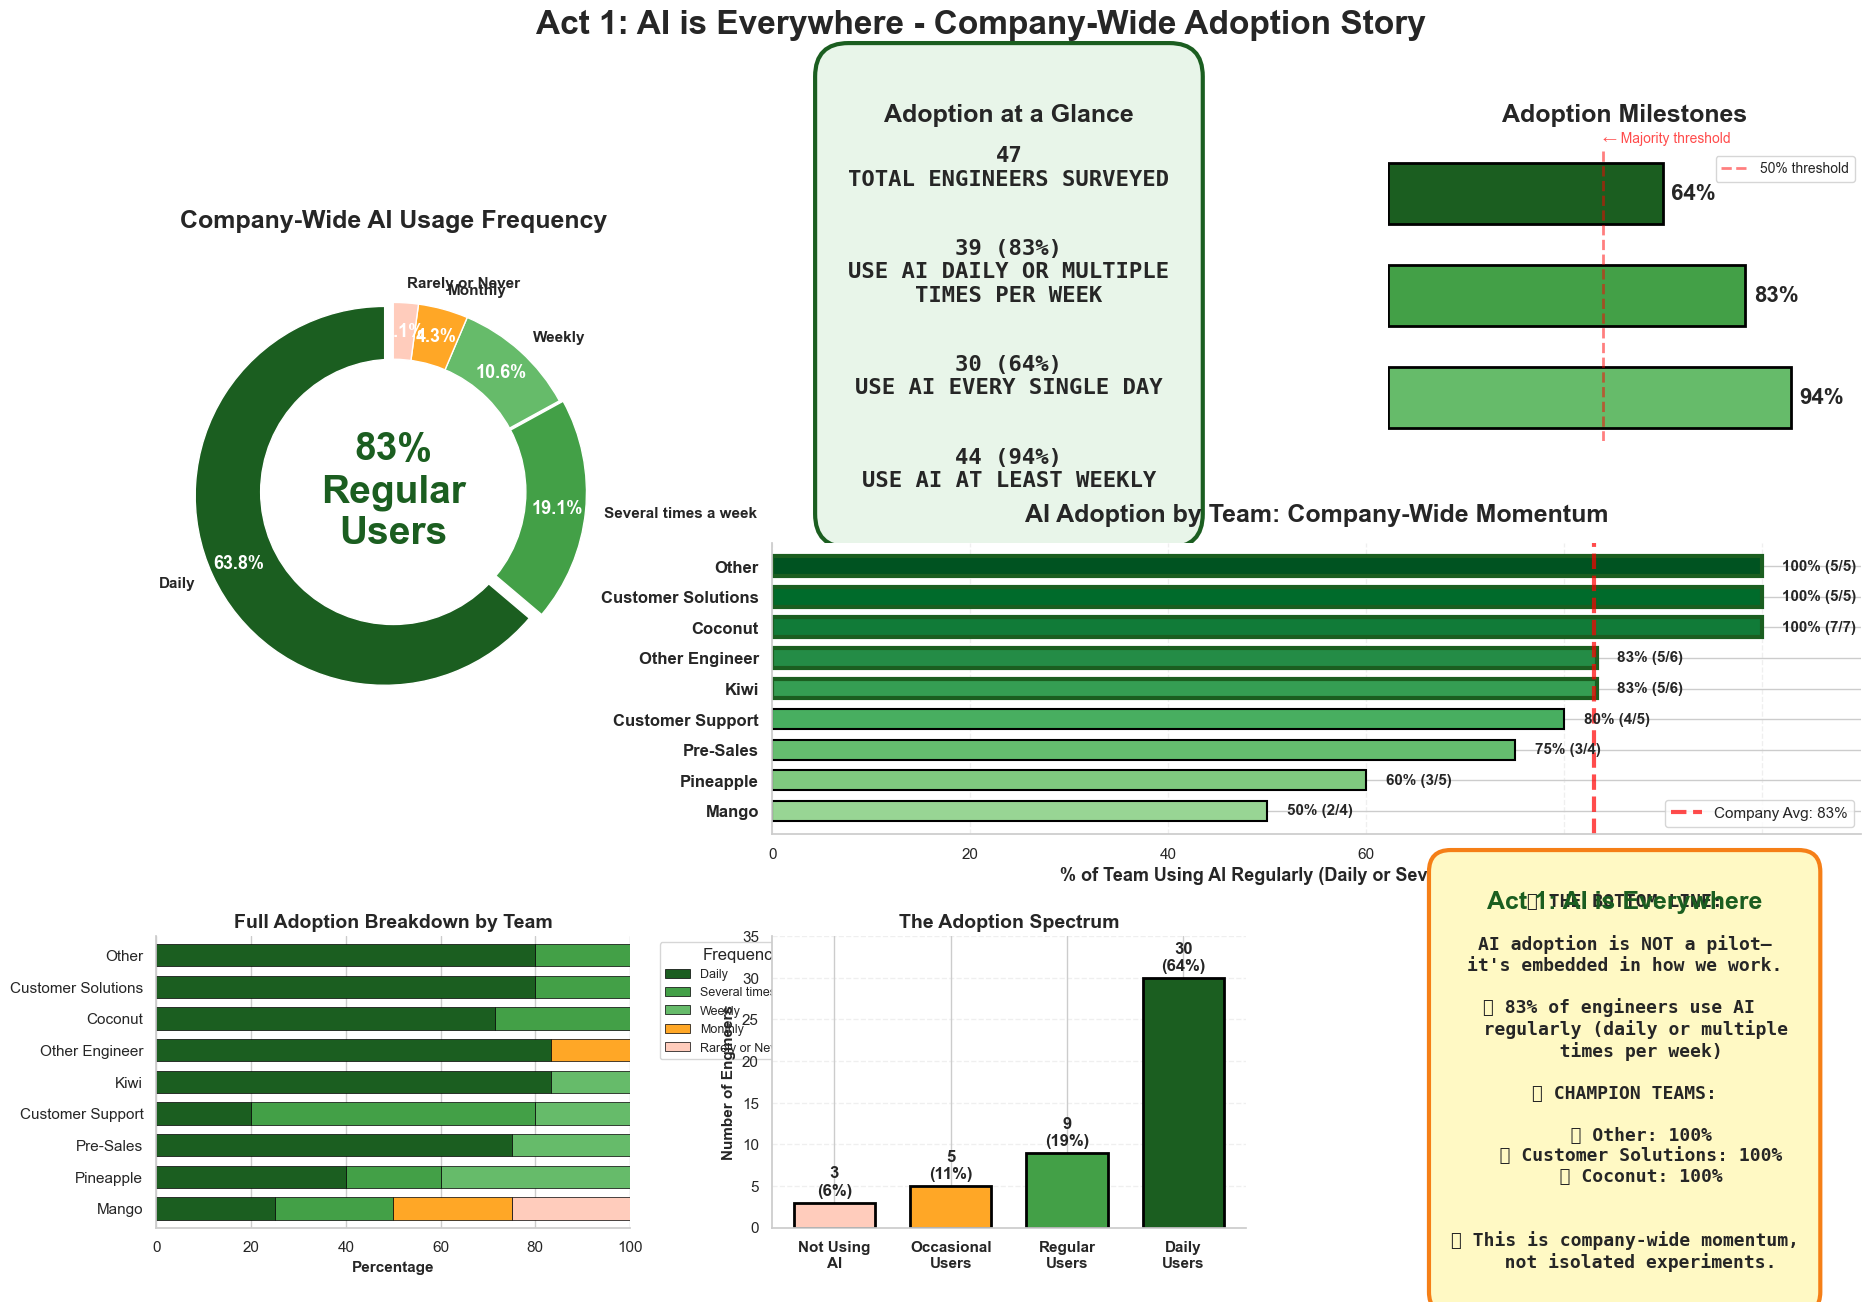


ACT 1: AI IS EVERYWHERE - EXECUTIVE SUMMARY

📊 OVERALL ADOPTION:
   • Total engineers surveyed: 47
   • Regular AI users: 39 (83.0%)
   • Daily users: 30 (63.8%)
   • Weekly or more frequent: 44 (93.6%)

🏆 TEAM CHAMPIONS (Top 5 by Regular Adoption):
   1. Other: 100.0% (5/5 members)
   2. Customer Solutions: 100.0% (5/5 members)
   3. Coconut: 100.0% (7/7 members)
   4. Other Engineer: 83.3% (5/6 members)
   5. Kiwi: 83.3% (5/6 members)


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the data
df = pd.read_csv('../responses.csv')

# Get column names
frequency_col = 'How frequently do you currently use AI tools/models in your development process?'
team_col = 'Which team are you a part of?'

# Define frequency order
frequency_order = ['Daily', 'Several times a week', 'Weekly', 'Monthly', 'Rarely or Never']

# Calculate key metrics
total_respondents = len(df)
frequency_counts = df[frequency_col].value_counts().reindex(frequency_order, fill_value=0)
daily_users = frequency_counts['Daily']
regular_users = frequency_counts['Daily'] + frequency_counts['Several times a week']
regular_percentage = (regular_users / total_respondents) * 100

# Create main figure
fig = plt.figure(figsize=(22, 14))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# ===== CHART 1: Main Adoption Donut Chart (Top Left - Large) =====
ax1 = fig.add_subplot(gs[0:2, 0])

colors = ['#1B5E20', '#43A047', '#66BB6A', '#FFA726', '#FFCCBC']
wedges, texts, autotexts = ax1.pie(
    frequency_counts.values,
    labels=frequency_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 11, 'weight': 'bold'},
    pctdistance=0.85,
    explode=[0.05, 0.02, 0, 0, 0]  # Emphasize daily users
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)

# Create donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add center text
ax1.text(0, 0, f'{regular_percentage:.0f}%\nRegular\nUsers', 
         ha='center', va='center',
         fontsize=28, weight='bold', color='#1B5E20')

ax1.set_title('Company-Wide AI Usage Frequency', fontsize=18, weight='bold', pad=20)

# ===== CHART 2: Big Stats Panel (Top Middle) =====
ax2 = fig.add_subplot(gs[0, 1])
ax2.axis('off')

# Calculate additional stats
weekly_plus = frequency_counts['Daily'] + frequency_counts['Several times a week'] + frequency_counts['Weekly']
weekly_plus_pct = (weekly_plus / total_respondents) * 100

stats_text = f"""


{int(total_respondents)}
TOTAL ENGINEERS SURVEYED


{int(regular_users)} ({regular_percentage:.0f}%)
USE AI DAILY OR MULTIPLE
TIMES PER WEEK


{int(daily_users)} ({daily_users/total_respondents*100:.0f}%)
USE AI EVERY SINGLE DAY


{int(weekly_plus)} ({weekly_plus_pct:.0f}%)
USE AI AT LEAST WEEKLY
"""

ax2.text(0.5, 0.5, stats_text, transform=ax2.transAxes,
         ha='center', va='center',
         fontsize=16, weight='bold', family='monospace',
         bbox=dict(boxstyle='round,pad=1.5', facecolor='#E8F5E9', 
                  edgecolor='#1B5E20', linewidth=3))

ax2.set_title('Adoption at a Glance', fontsize=18, weight='bold', pad=20)

# ===== CHART 3: Adoption Rate Gauge/Progress Bar (Top Right) =====
ax3 = fig.add_subplot(gs[0, 2])
ax3.axis('off')

# Create a visual gauge
categories = ['Daily\nUsers', 'Regular\nUsers', 'Weekly+\nUsers']
percentages = [
    daily_users/total_respondents*100,
    regular_percentage,
    weekly_plus_pct
]
colors_gauge = ['#1B5E20', '#43A047', '#66BB6A']

y_pos = [2, 1, 0]
bars = ax3.barh(y_pos, percentages, color=colors_gauge, height=0.6, edgecolor='black', linewidth=2)

# Add percentage labels
for bar, pct in zip(bars, percentages):
    ax3.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
            f'{pct:.0f}%', va='center', fontsize=16, weight='bold')

# Add reference line at 50%
ax3.axvline(50, color='red', linestyle='--', linewidth=2, alpha=0.5, label='50% threshold')

ax3.set_yticks(y_pos)
ax3.set_yticklabels(categories, fontsize=13, weight='bold')
ax3.set_xlim(0, 110)
ax3.set_xlabel('Percentage of Engineers', fontsize=12, weight='bold')
ax3.set_title('Adoption Milestones', fontsize=18, weight='bold', pad=20)
ax3.legend(fontsize=10)

# Add milestone annotations
ax3.text(50, 2.5, '← Majority threshold', fontsize=10, color='red', alpha=0.7)

# ===== CHART 4: Team-by-Team Adoption (Middle Row - Full Width) =====
ax4 = fig.add_subplot(gs[1, 1:])

# Get team frequency data
team_frequency = pd.crosstab(df[team_col], df[frequency_col])
team_frequency = team_frequency.reindex(columns=frequency_order, fill_value=0)

# Calculate regular users per team
team_regular = team_frequency['Daily'] + team_frequency['Several times a week']
team_total = team_frequency.sum(axis=1)
team_regular_pct = (team_regular / team_total * 100).sort_values(ascending=True)

# Create horizontal bar chart
colors_team = plt.cm.Greens(np.linspace(0.4, 0.95, len(team_regular_pct)))
bars = ax4.barh(range(len(team_regular_pct)), team_regular_pct.values, 
                color=colors_team, height=0.65, edgecolor='black', linewidth=1.5)

# Add value labels
for i, (bar, pct, team) in enumerate(zip(bars, team_regular_pct.values, team_regular_pct.index)):
    reg = team_regular[team]
    tot = team_total[team]
    ax4.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
            f'{pct:.0f}% ({int(reg)}/{int(tot)})', 
            va='center', fontsize=11, weight='bold')

# Add company average line
ax4.axvline(regular_percentage, color='red', linestyle='--', linewidth=3, 
           alpha=0.7, label=f'Company Avg: {regular_percentage:.0f}%')

ax4.set_yticks(range(len(team_regular_pct)))
ax4.set_yticklabels(team_regular_pct.index, fontsize=12, weight='bold')
ax4.set_xlabel('% of Team Using AI Regularly (Daily or Several Times/Week)', fontsize=13, weight='bold')
ax4.set_title('AI Adoption by Team: Company-Wide Momentum', fontsize=18, weight='bold', pad=15)
ax4.set_xlim(0, 110)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.legend(fontsize=11, loc='lower right')
ax4.grid(axis='x', alpha=0.3, linestyle='--')

# Highlight teams above average
for i, (bar, pct) in enumerate(zip(bars, team_regular_pct.values)):
    if pct >= regular_percentage:
        bar.set_edgecolor('#1B5E20')
        bar.set_linewidth(3)

# ===== CHART 5: Stacked Team View (Bottom Left) =====
ax5 = fig.add_subplot(gs[2, 0])

# Create percentage-based stacked bar
team_frequency_pct = team_frequency.div(team_frequency.sum(axis=1), axis=0) * 100
team_frequency_pct = team_frequency_pct.loc[team_regular_pct.index]  # Match order

colors_stack = ['#1B5E20', '#43A047', '#66BB6A', '#FFA726', '#FFCCBC']
team_frequency_pct.plot(kind='barh', stacked=True, ax=ax5, color=colors_stack, 
                        width=0.7, edgecolor='black', linewidth=0.5)

ax5.set_xlabel('Percentage', fontsize=11, weight='bold')
ax5.set_ylabel('')
ax5.set_title('Full Adoption Breakdown by Team', fontsize=14, weight='bold')
ax5.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax5.set_xlim(0, 100)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)

# ===== CHART 6: Adoption Heat (Bottom Middle) =====
ax6 = fig.add_subplot(gs[2, 1])

# Create a simple visual showing the scale
adoption_categories = ['Not Using\nAI', 'Occasional\nUsers', 'Regular\nUsers', 'Daily\nUsers']
adoption_counts = [
    frequency_counts['Rarely or Never'] + frequency_counts['Monthly'],
    frequency_counts['Weekly'],
    frequency_counts['Several times a week'],
    frequency_counts['Daily']
]
colors_adoption = ['#FFCCBC', '#FFA726', '#43A047', '#1B5E20']

bars = ax6.bar(range(len(adoption_categories)), adoption_counts, 
              color=colors_adoption, edgecolor='black', linewidth=2, width=0.7)

# Add count labels
for bar, count in zip(bars, adoption_counts):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{int(count)}\n({count/total_respondents*100:.0f}%)',
            ha='center', va='bottom', fontsize=12, weight='bold')

ax6.set_xticks(range(len(adoption_categories)))
ax6.set_xticklabels(adoption_categories, fontsize=11, weight='bold')
ax6.set_ylabel('Number of Engineers', fontsize=11, weight='bold')
ax6.set_title('The Adoption Spectrum', fontsize=14, weight='bold')
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.set_ylim(0, max(adoption_counts) + 5)
ax6.grid(axis='y', alpha=0.3, linestyle='--')

# ===== CHART 7: Key Message Box (Bottom Right) =====
ax7 = fig.add_subplot(gs[2, 2])
ax7.axis('off')

# Find champion teams
top_3_teams = team_regular_pct.tail(3)

message_text = f"""
🎯 THE BOTTOM LINE:

AI adoption is NOT a pilot—
it's embedded in how we work.

📊 {regular_percentage:.0f}% of engineers use AI 
   regularly (daily or multiple 
   times per week)

🏆 CHAMPION TEAMS:
"""

for i, (team, pct) in enumerate(top_3_teams.iloc[::-1].items(), 1):
    medals = ['🥇', '🥈', '🥉']
    message_text += f"\n   {medals[i-1]} {team}: {pct:.0f}%"

message_text += f"""


💡 This is company-wide momentum,
   not isolated experiments.
"""

ax7.text(0.5, 0.5, message_text, transform=ax7.transAxes,
         ha='center', va='center',
         fontsize=13, weight='bold', family='monospace',
         bbox=dict(boxstyle='round,pad=1.2', facecolor='#FFF9C4', 
                  edgecolor='#F57F17', linewidth=3))

ax7.set_title('Act 1: AI is Everywhere', fontsize=18, weight='bold', pad=20, color='#1B5E20')

# Main title
plt.suptitle('Act 1: AI is Everywhere - Company-Wide Adoption Story', 
             fontsize=24, weight='bold', y=0.98)

plt.tight_layout()
plt.show()

# ===== Print Executive Summary =====
print("\n" + "="*90)
print("ACT 1: AI IS EVERYWHERE - EXECUTIVE SUMMARY")
print("="*90)

print(f"\n📊 OVERALL ADOPTION:")
print(f"   • Total engineers surveyed: {total_respondents}")
print(f"   • Regular AI users: {int(regular_users)} ({regular_percentage:.1f}%)")
print(f"   • Daily users: {int(daily_users)} ({daily_users/total_respondents*100:.1f}%)")
print(f"   • Weekly or more frequent: {int(weekly_plus)} ({weekly_plus_pct:.1f}%)")

print(f"\n🏆 TEAM CHAMPIONS (Top 5 by Regular Adoption):")
for i, (team, pct) in enumerate(team_regular_pct.tail(5).iloc[::-1].items(), 1):
    reg = team_regular[team]
    tot = team_total[team]
    print(f"   {i}. {team}: {pct:.1f}% ({int(reg)}/{int(tot)} members)")